In [3]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

In [4]:
# Setup notebook
nbconfig = Nb.setup_notebook()

# Connect to data store
store = pd.HDFStore('../sra.h5', mode='r')

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-08-29 
Git hash: 3e6018d790e56d8ccd70647a7eccff8c120a8e6d


In [28]:
def parse(srx):
    try:
        df = pd.read_parquet(f'../aln-wf/output/samtools_idxstats/{srx}.parquet', columns=['# mapped reads'])
        df.columns = ['mapped']
        df = df.mapped
        prop =  df['chrM'] / df.sum()
    except:
        return
    return srx, prop

In [42]:
dd = pd.read_csv('../geo-wf/output/rnaseq_metadata.tsv', sep='\t')
srxs = dd.sample_name.tolist()

res = []
for srx in srxs:
    res.append(parse(srx))

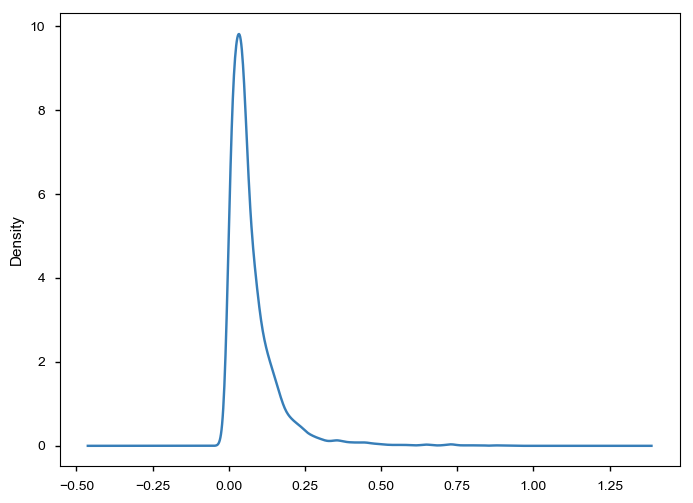

In [49]:
dat = pd.DataFrame(res, columns=['srx', 'prop']).set_index('srx')
ax = dat.prop.plot.kde()
fig = plt.gcf()
fig.savefig('../output/dist_mito.png')

In [50]:
dat.describe()

,prop
count,14423.000000
mean,0.075634
std,0.087537
min,0.000000
25%,0.025417
50%,0.049720
75%,0.094468
max,0.924951


In [57]:
bad = dat[dat.prop > .40].index.tolist()

In [63]:
dd.query(f'sample_name == {bad}').contact.unique()

array([nan, 'Sing-Hoi Sze <shsze@cse.tamu.edu>',
       'Ekaterina Khrameeva <e.khrameeva@skoltech.ru>',
       'Peter Combs <peter.combs@berkeley.edu>',
       'Martino Colombo <martino.colombo@dcb.unibe.ch>',
       'Amanda Crocker <acrocker@middlebury.edu>',
       'Katharine Abruzzi <katea@brandeis.edu>',
       'Jean-Yves Roignant <j.roignant@imb-mainz.de>',
       'Nelson Lau <nlau@brandeis.edu>',
       'Bernardo Lemos <blemos@hsph.harvard.edu>',
       'Tiffany Cook <tiffany.cook.cmmg@gmail.com>',
       'Brian Oliver <briano@helix.nih.gov>',
       'Weijin Xu <weijin@brandeis.edu>',
       'Carolyn Elya <cnelya@fas.harvard.edu>',
       'Jun Chen <cjnankai@gmail.com>',
       'Itai Yanai <yanai@technion.ac.il>',
       'Devanjali Dutta <d.dutta@zmbh.uni-heidelberg.de>',
       'Daniel Gerlach <gerlach@starklab.org>',
       'Maria Spletter <maria.spletter@gmail.com>'], dtype=object)